In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('user_data_CLEANED.csv',index_col=0)
pd.set_option('display.max_columns',50)
df.head()

,Gender,First Name,Last Name,Age,Annual Vacation Days,Average Monthly Spend on Entertainment,Number of Online Purchases in Last Month,Number of Charity Donations in Last Year,Average Weekly Exercise Hours,Investment Portfolio Value,Health Consciousness Rating,Education Level,Average Daily Screen Time,Environmental Awareness Rating,Social Media Influence Score,Risk Tolerance in Investments,Number of Professional Trainings Attended,Tech-Savviness Score,Financial Wellness Index,Lifestyle Balance Score,Entertainment Engagement Factor,Social Responsibility Index,Work-Life Balance Indicator,Investment Risk Appetite,Eco-Consciousness Metric,Stress Management Score,Time Management Skill,Lifestyle Choice,City,State,Country
0,M,Stephen,Graham,49,20.4558,40.4767,97.2243,1,0.0541,294.4833,0.6917,7.9403,6.6903,3.4319,5.4506,9.7318,4,12.2436,96.4670,26.6161,2.3066,0.0000,0.0088,7.2593,0.0152,5.1301,89.3802,Eco-Friendly,Melbourne,Tasmania,Australia
1,M,Eemil,Salminen,43,24.9226,9.2237,82.4243,1,0.6813,19.7512,5.5313,11.7970,7.6367,0.5887,2.4121,6.6954,7,10.7188,111.1809,31.3594,1.7568,0.1753,0.4631,6.8483,0.0000,4.0330,100.6926,Adventure Seeker,Imatra,Lapland,Finland
2,F,Sofia,Mitchell,37,15.0584,7.9816,163.5799,0,0.0398,217.2924,0.7065,0.8247,4.3922,3.7221,3.6993,6.6176,3,13.9977,90.3916,17.2615,1.8510,0.0410,0.0136,0.0000,0.0000,3.0287,31.9631,Urban Professional,Hudson,Nunavut,Canada
3,M,Azzeddine,De Kanter,22,7.2753,7.0638,128.3473,0,0.8181,2.3693,0.7348,12.8065,3.9565,2.0169,2.9082,5.9279,3,12.9286,57.1976,3.7736,1.6752,0.1308,0.8671,4.1594,0.0035,2.0505,32.1793,Budget-Conscious,Borne,Drenthe,Netherlands
4,M,Patrick,Dunn,38,24.6409,7.6343,126.6422,2,0.0000,2.4449,2.1085,3.2717,6.5593,0.6248,3.2550,7.5858,3,13.0188,149.7087,28.6690,1.9106,0.0000,0.0269,6.7901,0.4293,4.7058,27.9519,Health-Conscious,Sunshine Coast,Queensland,Australia


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475675 entries, 0 to 475687
Data columns (total 31 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Gender                                     475675 non-null  object 
 1   First Name                                 475675 non-null  object 
 2   Last Name                                  475675 non-null  object 
 3   Age                                        475675 non-null  int64  
 4   Annual Vacation Days                       475675 non-null  float64
 5   Average Monthly Spend on Entertainment     475675 non-null  float64
 6   Number of Online Purchases in Last Month   475675 non-null  float64
 7   Number of Charity Donations in Last Year   475675 non-null  int64  
 8   Average Weekly Exercise Hours              475675 non-null  float64
 9   Investment Portfolio Value                 475675 non-null  float64
 10  Health Consci

In [4]:
# check number of categorical and numercial values

numerical_col = df.select_dtypes(include=['int','float']).columns
len(numerical_col)

24

In [5]:
categorical_col = df.select_dtypes(include=['object']).columns
len(categorical_col)

7

In [6]:
# count of the target unique values
df['Lifestyle Choice'].nunique()

12

#### Observations:
- There is no missing values, which we already now because we already cleaned our data.
- There are 30 features + our target `Lifestyle Choice`
    - 24 numerical columns
    - 6 categorical columns + the target
- `Lifestyle Choice` has 12 unique value, so our target is multiclass not binary.

### Analyze Target Variable ('Lifestyle Choice')

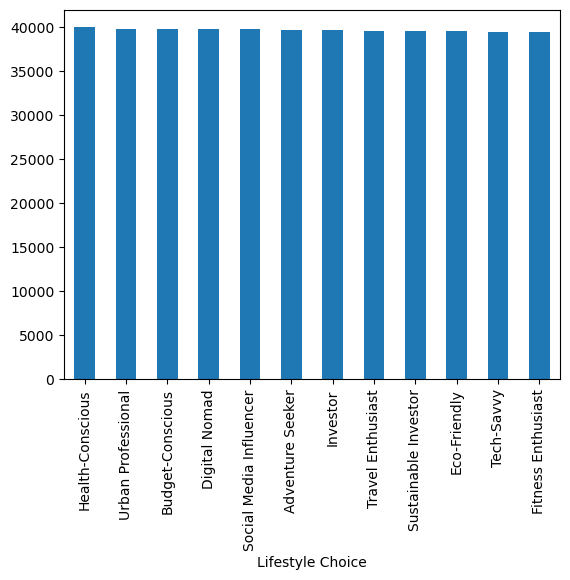

In [7]:
# the distribution of 'Lifestyle Choice' values

df['Lifestyle Choice'].value_counts().plot(kind='bar');

#### Observations

- Based on the bar chart above, our target is evenly distributed across all categories. So, class imbalance will not be an issue during model building.

### Features analyses

In [8]:
df.describe()

,Age,Annual Vacation Days,Average Monthly Spend on Entertainment,Number of Online Purchases in Last Month,Number of Charity Donations in Last Year,Average Weekly Exercise Hours,Investment Portfolio Value,Health Consciousness Rating,Education Level,Average Daily Screen Time,Environmental Awareness Rating,Social Media Influence Score,Risk Tolerance in Investments,Number of Professional Trainings Attended,Tech-Savviness Score,Financial Wellness Index,Lifestyle Balance Score,Entertainment Engagement Factor,Social Responsibility Index,Work-Life Balance Indicator,Investment Risk Appetite,Eco-Consciousness Metric,Stress Management Score,Time Management Skill
count,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000,475675.000000
mean,36.569437,19.898019,25.384324,135.537456,0.306819,0.485137,34.696693,1.023308,6.216511,4.583087,1.371868,6.249396,7.151487,3.121758,15.141130,107.220875,20.684245,1.837905,0.095053,0.246498,4.361561,0.128810,3.160087,36.877576
std,11.517904,11.626347,19.515636,30.241989,0.736760,0.967457,70.753543,0.922679,2.874044,2.106115,1.344135,4.170386,4.100331,1.398786,3.896109,53.041669,12.438207,0.336066,0.421448,0.303290,2.661873,0.340657,1.110126,30.720026
min,19.000000,0.000000,0.000000,20.313000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.799400,0.000000,0.000000,0.102400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,10.963950,8.836300,114.647550,0.000000,0.000400,5.488300,0.659900,3.978600,3.050200,0.565300,3.358000,4.448850,2.000000,12.814700,93.767100,10.798850,1.639800,0.000000,0.009700,1.798050,0.000000,2.405300,11.309000
50%,35.000000,19.343800,18.181800,134.554100,0.000000,0.059600,11.216500,0.741400,6.242800,4.510900,0.701800,4.690200,5.852400,3.000000,14.001600,99.637900,20.593900,1.870600,0.000000,0.075100,4.808600,0.007500,3.092100,28.946600
75%,44.000000,27.440900,40.750200,155.732550,0.000000,0.372000,18.815650,0.871800,8.460450,5.991000,1.731400,8.452150,8.832950,4.000000,15.686400,107.333750,29.380950,2.069900,0.082000,0.452200,6.857650,0.026900,3.841200,54.638500
max,100.000000,129.749100,191.214800,270.587800,8.000000,9.416800,1095.635600,13.431600,15.325400,15.240000,15.410600,44.965900,48.998000,11.000000,39.053200,593.796900,60.710000,3.318400,18.147300,1.583900,9.072100,3.247500,9.887100,121.644800


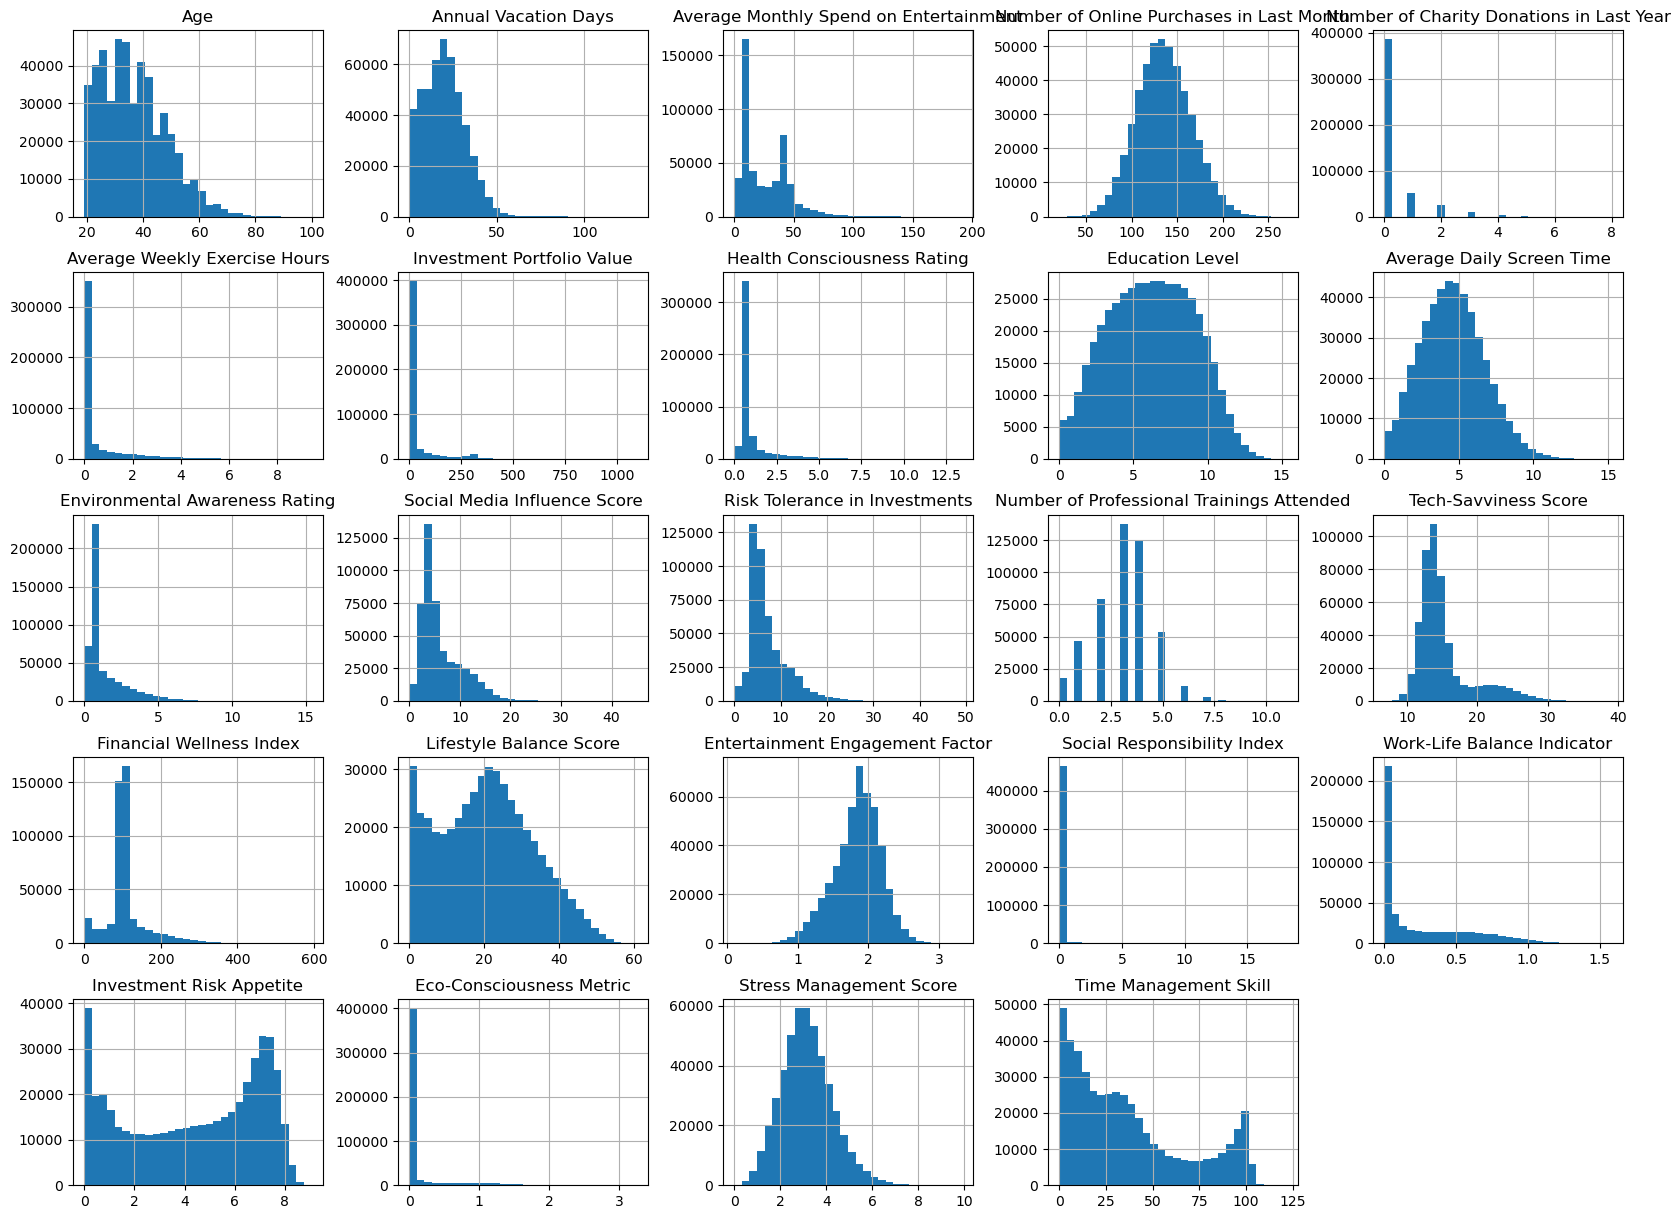

In [9]:
df[numerical_col].hist(figsize=(20, 15), bins=30);


#### Observations
- it seems like most of the numerical columns have extreme values, however some of them are reasonable like `Age`,`Average weekly exersice hours`, `Average monthly spend on Entertainment`,`Investment porifolio value` -specially for high-income individuals-, etc...
- The most unreasonable extreme values found in:
    - Annual Vacation Days (129.75 days)
    - Health Consciousness Rating (13.43 on what seems to be a much lower scale)
    - Risk Tolerance in Investments (48.99 on what seems to be a much lower scale)
    - Financial Wellness Index (593.79, which is extremely high compared to the mean)
    - Time Management Skill (121.64, which is likely on a 0-100 scale)
- we should consider binning `Number of Charity Donations in Last Year` and `Number of Professional Trainings Attended` into groups to reduce the impact of the outliers and improve the model performance.

#### Dealing with unreasonable outliers
Lets further check the extreme values in each of the 5 columns mentioned above.

In [10]:
#create a function to get the 5 quantiles 0.25, 0.5, 0.75, 0.95, 0.99 of each column
def calculate_quantiles(df, columns):
    quantile_results = {}
    
    for column in columns:
        if column in df.columns:
            quantiles = df[column].quantile([0.25, 0.5, 0.75, 0.95, 0.99,0.999])
            quantile_results[column] = quantiles.to_dict()
        else:
            print(f"Column '{column}' not found in the DataFrame.")
    
    return pd.DataFrame(quantile_results)

outlier_columns = ['Annual Vacation Days','Health Consciousness Rating','Risk Tolerance in Investments', 'Financial Wellness Index','Time Management Skill']
quantile_results = calculate_quantiles(df, outlier_columns)
print(quantile_results)

       Annual Vacation Days  Health Consciousness Rating  \
0.250             10.963950                     0.659900   
0.500             19.343800                     0.741400   
0.750             27.440900                     0.871800   
0.950             40.074560                     3.063200   
0.990             49.246830                     5.209026   
0.999             65.930198                     7.384961   

       Risk Tolerance in Investments  Financial Wellness Index  \
0.250                       4.448850                 93.767100   
0.500                       5.852400                 99.637900   
0.750                       8.832950                107.333750   
0.950                      15.246530                218.876820   
0.990                      21.064952                305.163252   
0.999                      27.947185                394.174211   

       Time Management Skill  
0.250              11.309000  
0.500              28.946600  
0.750              54.6

We can cap at the 99.9th quantile which means replaceing values with the upper value to get rid of the most extreme values without losing too much meaningful information.

In [11]:
# 1. Calculate the 99th percentile for each column
vacation_999 = df['Annual Vacation Days'].quantile(0.999)
health_999 = df['Health Consciousness Rating'].quantile(0.999)
risk_tolerance_999 = df['Risk Tolerance in Investments'].quantile(0.999)
financial_wellness_999 = df['Financial Wellness Index'].quantile(0.999)
time_management_999 = df['Time Management Skill'].quantile(0.999)

# 2. Apply capping (clipping the values)
df['Annual Vacation Days'] = df['Annual Vacation Days'].clip(upper=vacation_999)
df['Health Consciousness Rating'] = df['Health Consciousness Rating'].clip(upper=health_999)
df['Risk Tolerance in Investments'] = df['Risk Tolerance in Investments'].clip(upper=risk_tolerance_999)
df['Financial Wellness Index'] = df['Financial Wellness Index'].clip(upper=financial_wellness_999)
df['Time Management Skill'] = df['Time Management Skill'].clip(upper=time_management_999)


#### Binning `Number of Donation` and `number of training` columns

In [12]:
df['Number of Charity Donations in Last Year'].value_counts()

Number of Charity Donations in Last Year
0    386238
1     50247
2     25787
3     10162
4      2655
5       506
6        72
7         7
8         1
Name: count, dtype: int64

In [13]:
# Define bins and labels
bins = [-1,0,1,3,8]
labels = ['No Donation','Single Donation','Occational Donation <= 3','Regular Donation <=8']
#apply binning
df['Donation Class'] = pd.cut(df['Number of Charity Donations in Last Year'],bins=bins,labels=labels,include_lowest=True)
df['Donation Class'].value_counts()

Donation Class
No Donation                 386238
Single Donation              50247
Occational Donation <= 3     35949
Regular Donation <=8          3241
Name: count, dtype: int64

In [14]:
df['Donation Class'].unique()

['Single Donation', 'No Donation', 'Occational Donation <= 3', 'Regular Donation <=8']
Categories (4, object): ['No Donation' < 'Single Donation' < 'Occational Donation <= 3' < 'Regular Donation <=8']

In [15]:
df['Number of Professional Trainings Attended'].value_counts()

Number of Professional Trainings Attended
3     137939
4     125254
2      79441
5      53971
1      46215
0      17803
6      11301
7       2881
8        680
9        158
10        30
11         2
Name: count, dtype: int64

In [16]:
# Define bins and labels
training_bins = [-1, 0, 2, 5, df['Number of Professional Trainings Attended'].max()]
training_labels = ['No Training', 'Few Trainings 1-2', 'Moderate Trainings 3-4', 'High Trainings 6-11']

# Apply binning
df['Training Category'] = pd.cut(df['Number of Professional Trainings Attended'], 
                                 bins=training_bins, 
                                 labels=training_labels, 
                                 include_lowest=True)

In [17]:
df.columns

Index(['Gender', 'First Name', 'Last Name', 'Age', 'Annual Vacation Days',
       'Average Monthly Spend on Entertainment',
       'Number of Online Purchases in Last Month',
       'Number of Charity Donations in Last Year',
       'Average Weekly Exercise Hours', 'Investment Portfolio Value',
       'Health Consciousness Rating', 'Education Level',
       'Average Daily Screen Time', 'Environmental Awareness Rating',
       'Social Media Influence Score', 'Risk Tolerance in Investments',
       'Number of Professional Trainings Attended', 'Tech-Savviness Score',
       'Financial Wellness Index', 'Lifestyle Balance Score',
       'Entertainment Engagement Factor', 'Social Responsibility Index',
       'Work-Life Balance Indicator', 'Investment Risk Appetite',
       'Eco-Consciousness Metric', 'Stress Management Score',
       'Time Management Skill', 'Lifestyle Choice', 'City', 'State', 'Country',
       'Donation Class', 'Training Category'],
      dtype='object')

### Analyze categorical columns

In [18]:
# check the frequancy of the categorical values
df.select_dtypes(include='object').nunique()

Gender                  2
First Name          14217
Last Name           20265
Lifestyle Choice       12
City                13430
State                1089
Country              1578
dtype: int64

In [19]:
df['Country'].unique()

array(['Australia', 'Finland', 'Canada', ..., 'Milieu-Glarus-Switzerland',
       'Morrens-Solothurn-Switzerland', 'Marly-Genève-Switzerland'],
      dtype=object)

#### Observations

- There are columns with many categories that could casue high dimentionality (e.g City and state).
- while First and last name also considered as high dimentional column, however they wouldn't provide any valube info to our model. So, we might consider dropping them.

### check features for collinearity

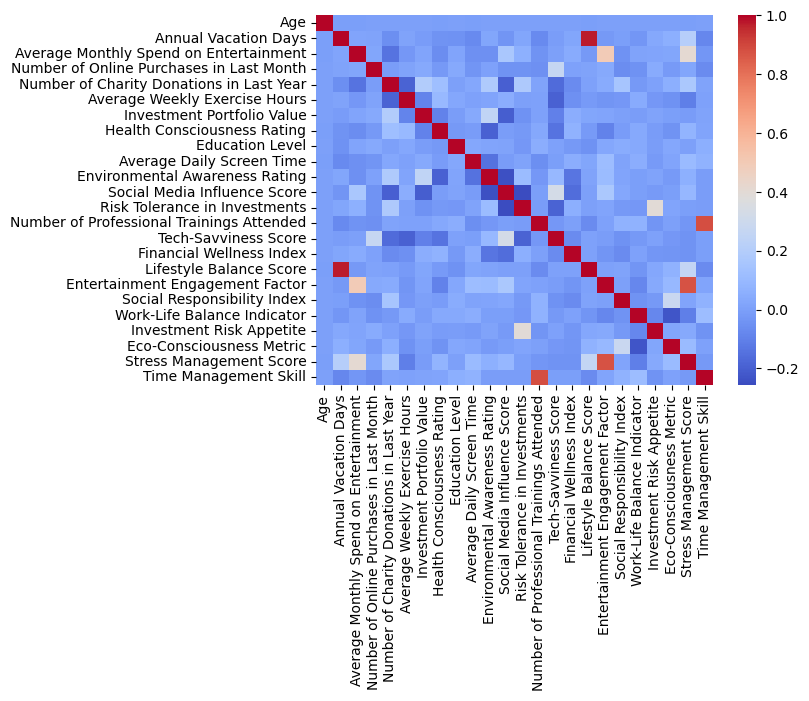

In [20]:
corr = df[numerical_col].corr()
sns.heatmap(corr, cmap='coolwarm');

In [21]:
abs(corr).apply(lambda x: x[x.index != x.name].max()).sort_values(ascending= False)


Annual Vacation Days                         0.974523
Lifestyle Balance Score                      0.974523
Time Management Skill                        0.887140
Number of Professional Trainings Attended    0.887140
Stress Management Score                      0.874368
Entertainment Engagement Factor              0.874368
Average Monthly Spend on Entertainment       0.497607
Investment Risk Appetite                     0.391613
Risk Tolerance in Investments                0.391613
Social Media Influence Score                 0.323369
Tech-Savviness Score                         0.323369
Social Responsibility Index                  0.280085
Eco-Consciousness Metric                     0.280085
Number of Online Purchases in Last Month     0.267875
Environmental Awareness Rating               0.248708
Investment Portfolio Value                   0.248708
Work-Life Balance Indicator                  0.227266
Number of Charity Donations in Last Year     0.200689
Average Weekly Exercise Hour

#### Observations
- High collinearity pairs (above 0.7):
    - `Annual Vacation Days` And `Lifestyle Balance Score`: We think about dropping "Annual Vacation Days". The "Lifestyle Balance Score" seems to be a more comprehensive metric that likely incorporates vacation time along with other factors.
    - `Time Management Skill` And `Number of Professional Trainings Attended`:We think about dropping "Number of Professional Trainings Attended". "Time Management Skill" is likely more directly relevant to productivity and overall performance. The number of trainings attended might be just one factor contributing to time management skills.
    - `Stress Management Score` And `Entertainment Engagement Factor`: We think about dropping "Entertainment Engagement Factor". The "Stress Management Score" appears to be more directly related to an individual's well-being and ability to handle workplace pressures. While entertainment engagement might contribute to stress management, it's likely just one of many factors, and the Stress Management Score probably provides a more holistic view.
`

### Dropping high collinearity, high dimentionality and redundant columns

In [22]:
preprocess_df = df.drop(columns=['First Name', 'Last Name','City','Annual Vacation Days','Number of Charity Donations in Last Year','Number of Professional Trainings Attended','Entertainment Engagement Factor'])
preprocess_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475675 entries, 0 to 475687
Data columns (total 26 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   Gender                                    475675 non-null  object  
 1   Age                                       475675 non-null  int64   
 2   Average Monthly Spend on Entertainment    475675 non-null  float64 
 3   Number of Online Purchases in Last Month  475675 non-null  float64 
 4   Average Weekly Exercise Hours             475675 non-null  float64 
 5   Investment Portfolio Value                475675 non-null  float64 
 6   Health Consciousness Rating               475675 non-null  float64 
 7   Education Level                           475675 non-null  float64 
 8   Average Daily Screen Time                 475675 non-null  float64 
 9   Environmental Awareness Rating            475675 non-null  float64 
 10  Social Media 

### Conclusion 

- Our Data set has over 400 thousand recode which cosiderd medium size dataset
- We removed most of the high dimentional columns but still we have some high dimentional columns
- Our dataset contaions outliers
    - Based on these findings we will build our model using Random forest algorithm 


In [23]:
preprocess_df.to_csv('preprocess_df.csv')